
# Challenge 1: Breast Cancer Dataset EDA
###    - WDBC data set analysis

<br>

  Script to download, read in and analyse breast cancer dataset from the 
[UCI machine learning repository:](https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Prognostic%29)
  
 <br>
 
  @author: mikeyrobinson@hotmail.com
 
 <br>
  
#### versions of libraries used
...........................
<ul>
    <li>numpy          1.19.2</li> 
<li>matplotlib     3.3.2</li>
<li>pandas         1.1.3</li>
<li>scikit-learn   0.23.2</li>
<li>scipy          1.5.2</li>
</ul>

...........................

In [2]:
# Modules
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
# Pre-processing and prediction
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score, cross_val_predict, train_test_split
from sklearn.metrics import confusion_matrix, precision_recall_curve, plot_precision_recall_curve
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
# ML Models tested
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

### Data link proivded:

In [3]:
data_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data"

### Create dataframe from "wdbc" dataset.  
####  - have entered header manually from information in file "wdbc.names" lines 111-126

In [4]:
header_orig = ["ID","diagnosis"]
header_repeat = [
    "radius",
    "texture",
    "perimeter",
    "area",
    "smoothness",
    "compactness",
    "concavity",
    "concave_points",
    "symmetry",
    "fractal_dimension"
    ]

header_set1 = [x + "_mean" for x in header_repeat]  #mean 
header_set2 = [x + "_SE" for x in header_repeat]    #standard error
header_set3 = [x + "_worst" for x in header_repeat] #worst or largest

header = header_orig + header_set1 + header_set2 + header_set3

### Get data from data source & include header
#### - preview data and check dataset dimensions

In [6]:
df = pd.read_csv(data_url,names=header)

print(df.head())     
print("The total dimensions of this dataset are: {}".format(df.shape))


         ID diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave_points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  radius_worst  texture_worst  perimeter_worst  area_wor

### Check for any missing or null data points

In [7]:
null_test = sum(df.isnull().sum())
nan_test = sum(df.isna().sum())

if null_test > 0 or nan_test > 0:
    print("Warning: Null test shows there are the following bad data points: ", null_test)
    print("Warning: Not-A-Number test shows there are the following bad data points: ", nan_test)
elif null_test == 0 and nan_test == 0:
    print("Pass: null and NaN test show dataset is complete")

Pass: null and NaN test show dataset is complete


## 1a. Calculate statistics for the perimeter data
    - Only interested in the perimeter_mean data (i.e. standard error and worst have not been analysed)

In [8]:
perim_stats = df.agg({"perimeter_mean": ["mean", "median", "std"]})

# print stats to screen
print(".........................................", "\n"
      "perimeter mean is:               ", "%.3f" %perim_stats.mean(), "\n"
      "perimeter median is:             ", "%.3f" %perim_stats.median(), "\n"
      "perimeter standard deviation is: ", "%.3f" %perim_stats.std(), "\n"
      "........................................."
      )

......................................... 
perimeter mean is:                67.503 
perimeter median is:              86.240 
perimeter standard deviation is:  37.525 
.........................................


## 1b. Determine if the "radius" is normally distributed
     - calculate statistics and plot radius data to establish if it is normally distributed

<p style="color:red; font-size: 13px;"> If we make the assumption that the radius is directly proportional to the perimeter, 
then we could state that the dataset is skewed due to the difference between the mean and the median.
However we should look at the radius statistics to be sure that this is actually the case. </p>


radius mean is:.................  14.127 
radius median is:...............  13.370 
radius standard deviation is:...  3.524 
radius mode is:.................  12.340 
radius skewness is:.............  0.942


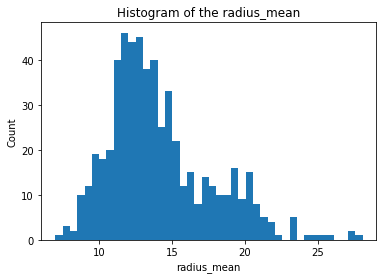

The histogram and statistics are showing that the distribution is skewed to the left and 
therefore, is not normally distributed.  This is described by the skewness statistic ~1, 
meaning the data is moderately skewed.  From studying the plot it is more likely that 
the distribution is bi-modal.  

The 1st mode being ~ from radius 7 to 17, the second mode ~ from 17 to 22. 

There are outliers beyond 22, however there is not enough data to determine if these would develop
into a third mode (i.e. to make multimodal)


In [9]:
statTest = 'radius_mean'
rad_mode = stats.mode(df[statTest])
rad_stats = df["radius_mean"].agg(["min", "max", "mean", "median", "skew","std"])
rad_rng = rad_stats[1] - rad_stats[0]                                    

print("radius mean is:................. ", "%.3f" %rad_stats[2], "\n"
      "radius median is:............... ", "%.3f" %rad_stats[3], "\n"
      "radius standard deviation is:... ", "%.3f" %rad_stats[5], "\n"
      "radius mode is:................. ", "%.3f" %rad_mode[0], "\n"
      "radius skewness is:............. ", "%.3f" %rad_stats[4]
      )

plt.hist(df[statTest], bins=2*int(rad_rng))
plt.xlim(np.floor(rad_stats[0]),np.ceil(rad_stats[1]))
plt.title('Histogram of the ' + statTest)
plt.xlabel(statTest)
plt.ylabel('Count')
plt.show()

print("""The histogram and statistics are showing that the distribution is skewed to the left and 
therefore, is not normally distributed.  This is described by the skewness statistic ~1, 
meaning the data is moderately skewed.  From studying the plot it is more likely that 
the distribution is bi-modal.  

The 1st mode being ~ from radius 7 to 17, the second mode ~ from 17 to 22. 

There are outliers beyond 22, however there is not enough data to determine if these would develop
into a third mode (i.e. to make multimodal)"""
     )

## 1c. Train a classifier to predict the diagnosis of malignant or benign. 
#### Compare the results of two classifiers e.g. SVM, logistic regression, decision tree etc.
 - Sort data for training and check the balance of the classifications

In [18]:
# Create numpy array for training/testing from dataframe, drop unwanted columns
X = np.array(df.drop(['diagnosis', 'ID'],1))

# convert benign/malignent to binary
class_change = {'M': 1,'B': 0}
y = [class_change[item] for item in df['diagnosis']]
y = np.array(y,dtype=np.float32)

# check balance of "classification" dataset using Entropy
y_series = pd.Series(y)
y_counts = y_series.value_counts()
y_perc = y_counts[1] / y_counts[0] * 100
y_entropy = stats.entropy(y_counts)

print("Number of benign to malignent cases is: ", 
      "%0.0f" %y_counts[0], "vs", "%0.0f" %y_counts[1], "\n"
      "Therefore, benign is ", "%0.0f" %y_perc, "% of the dataset", "\n"
      "The entropy is: ", "%0.3f" %y_entropy,
      "which is considered relatively well balanced based on 0=unbalanced, 1=balanced \n"
      "therefore no further resampling/balancing of the data is necessary"
      )

Number of benign to malignent cases is:  357 vs 212 
Therefore benign is  59 % of the dataset 
The entropy is:  0.660 which is considered relatively well balanced based on 0=unbalanced, 1=balanced 
therefore no further resampling/balancing of the data is necessary


#### Preprocessing to normalise data between 0 and 1 and setup Train/Test split of data

In [11]:
# preprocessing - normalise data between 0 and 1
scaler = MinMaxScaler()
scaler.fit(X)
X_norm = scaler.transform(X)
# generate train and test data from dataframe train test split based on 80/20
X_train, X_test, y_train, y_test = train_test_split(X_norm, y, test_size=0.2, random_state=42)

#### Setup linear SVM classification using cross validate to split train/test data 'x' times
- for small datasets SVC is fine, can use LinearSVC for larger data

In [31]:
# set up linear hyperplane with a relatively large soft-margin (C=1)
margin = 1  #try 0.1, 1, 10 etc
clf_its = 5  #try out different numbers of cross_val iterations (e.g. 2 to 10)
clf = SVC(kernel='linear', C=margin, random_state=42) #for small datasets SVC is fine 
#clf = LinearSVC(C=margin)  #can use LinearSVC for larger datasets
scores_svc = cross_val_score(clf, X_train, y_train, scoring="accuracy", cv=clf_its)
y_train_prediction_svc = cross_val_predict(clf, X_train, y_train, cv=clf_its)

print("running cross validation %d times on training data gives fitting scores of:" % clf_its, "\n"
      " ",  scores_svc, "\n"
      "...with %0.3f mean accuracy and standard deviation of %0.2f" % (scores_svc.mean(), scores_svc.std()), "\n"
      "this is using a soft-margin for fitting of %0.2f: " %margin
      )

running cross validation 5 times on training data gives fitting scores of: 
  [0.98901099 0.96703297 0.98901099 0.97802198 0.96703297] 
...with 0.978 mean accuracy and standard deviation of 0.01 
this is using a soft-margin for fitting of 1.00: 


accuracy of the SVM test classification is: 0.982 
 
Therefore, comparing the SVM training and test accuracy we have: 
Training accuracy = 0.978 
Test accuracy     = 0.982
-----------------------------------------------------------
 Confusion matrix for SVC model is: 
 [[285   1]
 [  9 160]] 
 Precision is equal to:  0.994 
 Recall is equal to:  0.947 
 F1 score is equal to:  0.970


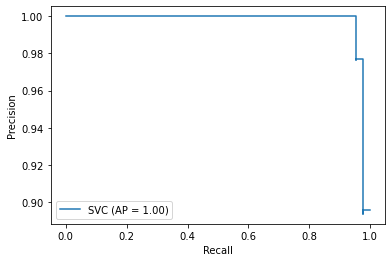

In [34]:
#### now fit predicted to training dataset
clf.fit(X_train, y_train)

prediction_svc = clf.predict(X_test)
accuracy_svc = accuracy_score(prediction_svc, y_test)

print("accuracy of the SVM test classification is: %0.3f" %accuracy_svc, "\n", "\n"
      "Therefore, comparing the SVM training and test accuracy we have: \n"
      "Training accuracy = %0.3f" %scores_svc.mean(), "\n"
      "Test accuracy     = %0.3f" %accuracy_svc)

#confuse_matrix = confusion_matrix(y_test, y_prediction)
confuse_matrix_svc = confusion_matrix(y_train, y_train_prediction_svc)

precision_svc = precision_score(y_train, y_train_prediction_svc)
recall_svc = recall_score(y_train, y_train_prediction_svc)
f1_svc = f1_score(y_train, y_train_prediction_svc)

print("-----------------------------------------------------------\n",
      "Confusion matrix for SVC model is: \n", confuse_matrix_svc, "\n"
      " Precision is equal to: ", "%0.3f" %precision_svc, "\n"
      " Recall is equal to: ", "%0.3f" %recall_svc, "\n"
      " F1 score is equal to: ", "%0.3f" %f1_svc
      )

disp = plot_precision_recall_curve(clf, X_test, y_test)

#### Setup DecisionTreeClassifier using cross val to split train/test data x times


In [35]:
# setup classifier and determine max depth and number of cross validation iterations

maxDepth = 5 #change from 1 to number of samples -1 (n-1)-although not recommended as will likely overfit
             #default max_depth is None, changed to input to see what difference it makes to prediction 
clf = DecisionTreeClassifier(max_depth=maxDepth, random_state=42) #change max_depth to None to let sklearn decide
clf_its = 5
scores_dtc = cross_val_score(clf, X_train, y_train, scoring="accuracy", cv=clf_its)
y_train_prediction_dtc = cross_val_predict(clf, X_train, y_train, cv=clf_its)

print("running cross validation %d times gives fitting scores of:" % clf_its, "\n"
      " ",  scores_dtc, "\n"
      "...with %0.2f mean accuracy and standard deviation of %0.2f" % (scores_dtc.mean(), scores_dtc.std()), "\n"
      "this is using a maximum depth of: %0.0f " %maxDepth
      )

running cross validation 5 times gives fitting scores of: 
  [0.91208791 0.9010989  0.96703297 0.91208791 0.93406593] 
...with 0.93 mean accuracy and standard deviation of 0.02 
this is using a maximum depth of: 5 


Accuracy of the Decision Tree test classification is: 0.947 

 Therefore, comparing Decision Tree training and test accuracy we have: 
Training accuracy = 0.925 
Test accuracy     = 0.947
----------------------------------------------------------------- 
Confusion matrix for DecisionTree model is: 
 [[271  15]
 [ 19 150]] 
 Precision is equal to:  0.909 
 Recall is equal to:  0.888 
 F1 score is equal to:  0.898


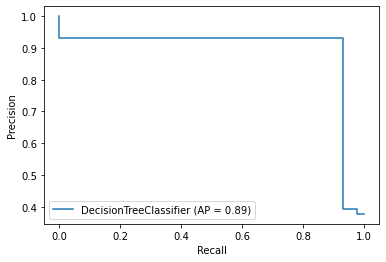

In [36]:
#### now fit predicted to training dataset
clf.fit(X_train, y_train)

prediction_dtc = clf.predict(X_test)
accuracy_dtc = accuracy_score(prediction_dtc, y_test)

print("Accuracy of the Decision Tree test classification is: %0.3f" %accuracy_dtc, "\n\n",
      "Therefore, comparing Decision Tree training and test accuracy we have: \n"
      "Training accuracy = %0.3f" %scores_dtc.mean(), "\n"
      "Test accuracy     = %0.3f" %accuracy_dtc)

#confuse_matrix = confusion_matrix(y_test, y_prediction)
confuse_matrix_dtc = confusion_matrix(y_train, y_train_prediction_dtc)

precision_dtc = precision_score(y_train, y_train_prediction_dtc)
recall_dtc = recall_score(y_train, y_train_prediction_dtc)
f1_dtc = f1_score(y_train, y_train_prediction_dtc)

print("-----------------------------------------------------------------", "\n"
      "Confusion matrix for DecisionTree model is: \n", confuse_matrix_dtc, "\n"
      " Precision is equal to: ", "%0.3f" %precision_dtc, "\n"
      " Recall is equal to: ", "%0.3f" %recall_dtc, "\n"
      " F1 score is equal to: ", "%0.3f" %f1_dtc
      )

disp = plot_precision_recall_curve(clf, X_test, y_test)

### Conclusion:

<p style="color:red; font-size: 15px;">By simple comparison of the confusion matrix of the two classifiers it
appears as if the linear Support Vector classifier is better at predicting 
malignent vs benign tumors due to its smaller size of false positives and 
false negatives. This is also shown in the higher levels of prediction 
accuracy from the training/test sets. </p>